In [32]:
# Dependecies and Set up
import numpy as np
import datetime as dt
import pandas as pd
import numpy as np
import pandas as pd
import os
from pandas.plotting import table

In [33]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [34]:
#Importing sqlalchemy Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import create_engine, inspect, func
from sqlalchemy import Column, Integer, String, Float, Text, ForeignKey
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import Session,sessionmaker, relationship

# Reflect Tables into SQLAlchemy ORM

In [35]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [36]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [37]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [38]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [39]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [40]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [41]:
# Use a basic query to validate that the data was inserted correctly for table `measurement`
engine.execute("SELECT * FROM measurement LIMIT 10").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [42]:
# Use a basic query to validate that the data was inserted correctly for table `station`
engine.execute("SELECT * FROM station LIMIT 10").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [43]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [44]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [45]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# The last date entry in the data table
last_datapoint_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_datapoint_date)

('2017-08-23',)


In [46]:
# to get the last 12 months of data, last date (2017-08-23') - 365
last_12month = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_12month)

2016-08-23


In [47]:
# Perform a query to retrieve the data and precipitation scores
prev_yr_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_12month).all()

In [48]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prev_yr_prcp_df = pd.DataFrame(prev_yr_prcp, columns=['date', 'precipitation'])
prev_yr_prcp_df.set_index('date', inplace=True)

# Sort the dataframe by date
prev_yr_prcp_df.sort_values("date").head()

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


NaN values are displayed and can create ambiguity. For our trip, I will sub the NaN values with the mean value

In [49]:
 # Using the mean value to sub the Nan values so that we will get a better picture of our vacation stay precipitation
prev_yr_prcp_df.fillna(prev_yr_prcp_df.mean(), inplace=True)

In [50]:
# Sort the dataframe by date and displaying the first 5 rows
prev_yr_prcp_df.sort_values("date").head()

,precipitation
date,
2016-08-23,0.000000
2016-08-23,0.177279
2016-08-23,1.790000
2016-08-23,0.050000
2016-08-23,0.150000


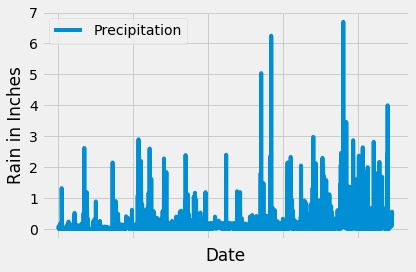

In [51]:
# Using Matplotlib to plot the data
prev_yr_prcp_df.plot(x_compat=True)

# Rotate the xticks for the dates
plt.xticks(rotation='45')
# labels
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.legend(["Precipitation"])
plt.tight_layout()
plt.show()

In [52]:
# calcualte the summary statistics for the precipitation data
prev_yr_prcp_df.describe()

,precipitation
count,2230.000000
mean,0.177279
std,0.439036
min,0.000000
25%,0.000000
50%,0.030000
75%,0.177279
max,6.700000


In [53]:
# Design a query to show how many stations are available in this dataset?
# How many stations are available station dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [54]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

The most active station is 'USC00519281' with 2772 observatiions 

In [55]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

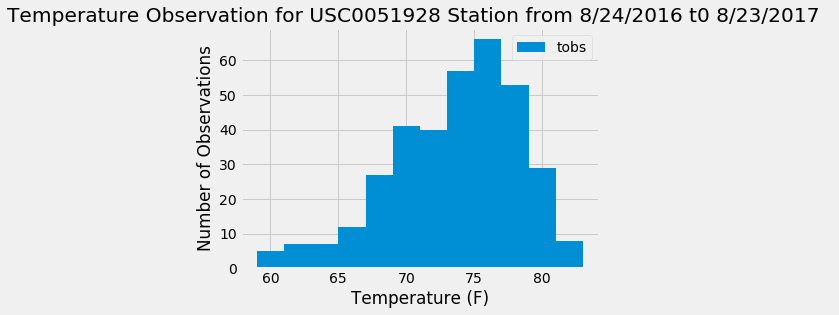

In [56]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12month = dt.date(2017, 8, 23) - dt.timedelta(days=365)

highest_temp_obs = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= last_12month).all()
highest_temp_obs_df = pd.DataFrame(highest_temp_obs, columns=['tobs'])
highest_temp_obs_df.plot.hist(bins=12)
plt.tight_layout()
# labels 
plt.xlabel("Temperature (F)")
plt.ylabel("Number of Observations")
plt.title("Temperature Observation for USC0051928 Station from 8/24/2016 t0 8/23/2017  ")
plt.show()

In [57]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [58]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

# Trip date chosen: Arrival date 2018-08-10 Deaprture date 2018-08-23 

last_12month_arrival = dt.date(2018, 8, 10) - dt.timedelta(days=365)
last_12month_departure = dt.date(2018, 8, 23) - dt.timedelta(days=365)

tmin,tavg,tmax = calc_temps(last_12month_arrival.strftime("%Y-%m-%d"), last_12month_departure.strftime("%Y-%m-%d"))[0]
print(tmin_tavg_tmax)

(70.0, 78.71428571428571, 85.0)


C:\Users\owner\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


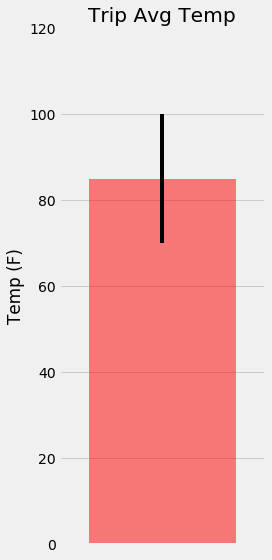

In [59]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig, ax = plt.subplots(figsize=plt.figaspect(2.))
xpos = 1
yerr = tmax-tmin

bar = ax.bar(xpos, tmax, yerr=yerr, alpha=0.5, color='red', align="center")
ax.set(xticks=range(xpos), xticklabels="a", title="Trip Avg Temp", ylabel="Temp (F)")
ax.margins(.2, .2)
# fig.autofmt_xdate()
fig.tight_layout()
fig.show()

In [60]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
last_12month_arrival = dt.date(2018, 8, 10) - dt.timedelta(days=365)
last_12month_departure = dt.date(2018, 8, 23) - dt.timedelta(days=365)

sel = [Station.station, Station.name, Station.latitude, 
       Station.longitude, Station.elevation, func.sum(Measurement.prcp)]

rain_per_station = session.query(*sel).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.date >= last_12month_arrival).\
    filter(Measurement.date <= last_12month_departure).\
    group_by(Station.name).order_by(func.sum(Measurement.prcp).desc()).all()
print(rain_per_station)

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 3.0), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.51), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.34), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.04), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.02)]


## Optional Challenge Assignment - I have not done the optional challenge 

In [61]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]